## 统计方法实验三--Simulation--10215501435 杨茜雅
### 实现一个模拟实验

## 实验任务
1. 绘制一张图片（以k作为横坐标），偏差平方、方差以及均方误差这三条曲线；
2. 基于所绘制的图象，请评述，模型的欠拟合和过拟合分别对预测结果造成怎样的影响？

## 背景描述  

定义$Bias^2_k,\ Var_k,\ MSE_k$分别为第 k 个线性回归模型的偏差平方、方差和均方误差。

## 参数设置

参数设置如下:

i. $(p, p_1) = (20, 10)$;

ii. $\sigma_\epsilon = 3$; 量化误差的波动

iii. $\sigma = 0.2$; 量化自变量的波动

iv. 预测点的位置 $\pmb{x}_0 = (1, \pmb{0.05}^′_{20})^′$;

v. 重复次数 $M = 5000$

$$
\begin{aligned}
\operatorname{Bias}_{k}^{2} &=\left(\frac{1}{M} \sum_{m=1}^{M} \hat{y}_{0, m}^{(k)}-\boldsymbol{x}_{0}^{\prime} \boldsymbol{\beta}\right)^{2} \\
\operatorname{Var}_{k} &=\frac{1}{M} \sum_{m=1}^{M}\left(\hat{y}_{0, m}^{(k)}-\frac{1}{M} \sum_{m=1}^{M} \hat{y}_{0, m}^{(k)}\right)^{2} \\
\mathrm{MSE}_{k} &=\frac{1}{M} \sum_{m=1}^{M}\left(\hat{y}_{0, m}^{(k)}-\boldsymbol{x}_{0}^{\prime} \boldsymbol{\beta}\right)^{2}
\end{aligned}
$$

$$
\operatorname{MSE}\left(\hat{y}_{0}\right)=E\left(\hat{y}_{0}-E\left(y_{0}\right)\right)^{2}=\operatorname{Bias}^{2}\left(\hat{y}_{0}\right)+\operatorname{Var}\left(\hat{y}_{0}\right)
$$

### Task1：绘制一张图片（以k作为横坐标），偏差平方、方差以及均方误差这三条曲线；

In [1]:
import os # 修改工作目录

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [2]:
Bias_sq=[] # 偏差平方
Var=[]  # 方差
MSE=[]  # 均方误差

In [3]:
M=5000           # 模拟次数
p=20             # 自变量总数
p1=10           
sigma=0.2  # xi
sigma_e=3  # ei
N=500  # 特征向量列维度

确定自变量范围，最少$1$个，最多$20$个（总自变量数为$20$个）

期望$mean$和协方差$cov$用于后面生成多元正态的特征矩阵$X$，其中$mean$为$0_p$；$cov$对角项为$\sigma^2$，其余为$0$，因为独立

定义$x_0=(1,0.05_{20}^{'})^{'}$，参数$\beta=(1_{1+p_1}^{'},0_{p-p_1}^{'})^{'}$，这样构造的 $\beta$ 使得$X$中的前$p_1+1$列的特征（包括常数项）对因变量有影响。



In [4]:
k_least=1  # 最少自变量数
k_most=20  # 最多自变量数

mean=np.zeros((p)) # xi均值，维度20
# 协方差
cov=np.zeros((p,p))
for i in range(p):
    cov[i][i]=sigma**2

# 预测样本
x0=np.array([1]+[0.05]*p) 
beta=np.array([1]*(1+p1)+[0]*(p-p1))

$y_0=x_0^{'}\beta+\epsilon_0$的最佳点预测值为$x_0^{'}\beta$

In [5]:
y0=np.sum(beta*x0)

开始模拟实验，首先选择遍历自变量个数，从$1$到$20$，后面$y\_hat$用来存放$y_0$的预测值${\hat{y}_{0,m}}^{(k)}$

在第二层循环中重复$5000$次可以得到$5000$个不同的预测值。

1. 首先通过随机多元正态分布来生成特征矩阵$X=(x_{ij})_{n\times(p+1)}$，有

$$
\mathbf{X} = \begin{pmatrix}
1 & x_{11} & x_{12} &\cdots & x_{1p}\\
1 & x_{21} & x_{22} &\cdots & x_{2p}\\
\vdots & \vdots & \vdots && \vdots\\
1 & x_{n1} & x_{n2} &\cdots & x_{np}\\
\end{pmatrix}
= \begin{pmatrix}
1 & {x_{1}}^{'}\\
1 & {x_{2}}^{'}\\
\vdots & \vdots\\
1 & {x_{n}}^{'}\\
\end{pmatrix}
$$

其中 ${x_{i}}^{'},i=1,2, \cdots ,n$是独立同分布的服从多元正态分布的$p$维随机向量。

同时，误差向量$\epsilon=(\epsilon_1,\epsilon_2,\cdots,\epsilon_n)^{'}$ ，$\epsilon_i$独立同分布于正态分布$N(0,\sigma_\epsilon^2),i=1,2,\cdots,n$；而响应变量$y=X\beta+\epsilon$。

2. 其次，通过使用$sklearn$的线性回归进行数据拟合，得到最小二乘估计$\hat{\beta}^{(k)}=(\hat{\beta}_0,\hat{\beta}_1,\cdots,\hat{\beta}_k,0^{'}_{20-k})^{'}$，并且可算得$y_0$的预测值为$\hat{y}_0^{(k)}=x_0^{'}\hat{\beta}^{(k)}$

3. 最后通过$5000$次循环算得预测值，通过公式计算出每$k$个自变量对应的$Bias\_sq,Var,MSE$

In [6]:
for k in range(k_least,k_most+1):
    y_hat=[]
    for m in range(M):
        x=np.random.multivariate_normal(mean,cov,(N,),'raise') # 生成多元正态分布
        e=np.random.normal(loc=0,scale=sigma_e,size=N)
        y=[np.sum(beta*([1]+list(x[n1]))) for n1 in range(N)]+e
        
        # scikit-learn
        x_=[x[n2][:k] for n2 in range(N)]
        model=linear_model.LinearRegression()
        model.fit(x_,y)
        beta_hat=np.append(np.array(model.intercept_),model.coef_)
        
        y_hat.append(np.sum(beta_hat*x0[:k+1]))
    y_hat=np.array(y_hat)
    
    Bias_sq.append((np.mean(y_hat)-y0)**2)
    Var.append(np.mean((y_hat-np.mean(y_hat))**2))
    MSE.append(np.mean((y_hat-y0)**2))

偏差平方Bias^2：
自变量个数： 1   Bias^2： 0.20083213457959573
自变量个数： 2   Bias^2： 0.16081206770682696
自变量个数： 3   Bias^2： 0.12032875505239826
自变量个数： 4   Bias^2： 0.08900993021302088
自变量个数： 5   Bias^2： 0.06293056262094412
自变量个数： 6   Bias^2： 0.04050426844237154
自变量个数： 7   Bias^2： 0.02235820163008092
自变量个数： 8   Bias^2： 0.009643121832374795
自变量个数： 9   Bias^2： 0.0028395519979369514
自变量个数： 10   Bias^2： 3.1717022009772384e-06
自变量个数： 11   Bias^2： 6.062906432968728e-07
自变量个数： 12   Bias^2： 2.751569743483037e-06
自变量个数： 13   Bias^2： 2.9400730123947916e-07
自变量个数： 14   Bias^2： 1.6950098081183948e-07
自变量个数： 15   Bias^2： 9.843085435084025e-07
自变量个数： 16   Bias^2： 8.896594696734178e-07
自变量个数： 17   Bias^2： 7.873765131895508e-06
自变量个数： 18   Bias^2： 1.8290078449077238e-06
自变量个数： 19   Bias^2： 9.383923549618004e-07
自变量个数： 20   Bias^2： 7.05348950324228e-06
方差Var：
自变量个数： 1   Var： 0.020291394299496848
自变量个数： 2   Var： 0.021087275966457705
自变量个数： 3   Var： 0.021409761743485835
自变量个数： 4   Var： 0.022541170564440223
自变量个数： 5   Var

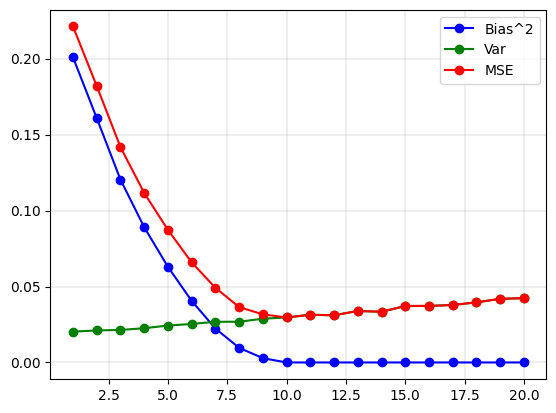

In [7]:
print('偏差平方Bias^2：')
for i in range(len(Bias_sq)):
    print('自变量个数：',i+1,'  Bias^2：',Bias_sq[i])
print('方差Var：')
for i in range(len(Var)):
    print('自变量个数：',i+1,'  Var：',Var[i])
print('均方误差MSE：')
for i in range(len(MSE)):
    print('自变量个数：',i+1,'  MSE：',MSE[i])
MSE_argmin=np.argmin(MSE) 
MSE_min=np.min(MSE)
print('MSE最⼩所对应的⾃变量个数:',MSE_argmin+1,'  MSE：',MSE_min)

plot_range=range(k_least,k_most+1)
plt.plot(plot_range,Bias_sq,label="Bias^2",color="b",marker="o")
plt.plot(plot_range,Var,label="Var",color="g",marker="o")
plt.plot(plot_range,MSE,label="MSE",color="r",marker="o")
plt.grid(True,linewidth="0.3")
plt.legend()
plt.show()

### Task2：基于所绘制的图象，请评述，模型的欠拟合和过拟合分别对预测结果造成怎样的影响？

## 由上图可以观察得：

- 在过拟合的情况下，也就是横坐标x=10右边的图片部分，均方误差会随着模型复杂度的提升而增加，偏差平方则变为0并保持，而方差呈上升状态，且与均方误差的趋势几乎一样（不完全重合）
- 在欠拟合的情况下，也就是横坐标x=10左边的图片部分，均方误差和偏差平方都呈下降状态，在最佳时（大约在10左右）降到最低点，而方差持续上升，大致呈线性。